<img src="./images/banner.png" width="800">

# Feature Engineering: Creation and Transformation

In the realm of machine learning, data is king. But raw data alone is often not enough to build highly accurate predictive models. This is where feature engineering comes into play – a crucial step that can transform average models into exceptional ones.


Feature engineering is the art and science of using domain knowledge to extract new features from raw data. It's a process that bridges the gap between the data you have and the insights you seek. By creating features that better represent the underlying patterns in your data, you can significantly enhance your model's performance and robustness.


<img src="./images/feature-engineering.jpg" width="600">

🔑 **Key Concept:** Feature engineering is about making the implicit explicit – turning hidden patterns and relationships in your data into clear, quantifiable features that your model can easily interpret.


Imagine you're building a model to predict house prices. Your raw data might include square footage, number of bedrooms, and zip code. These are useful, but they might not capture all the nuances that influence a house's value. Through feature engineering, you might create new features like:

- Price per square foot
- Ratio of bedrooms to bathrooms
- Distance to nearest school or shopping center
- Average income in the neighborhood


These engineered features provide richer, more contextual information that can lead to more accurate predictions. They encapsulate domain knowledge and complex relationships in a way that's digestible for machine learning algorithms.


Feature engineering is not a one-time task, but an iterative process of discovery and refinement. It typically unfolds as follows:

1. Start with a deep dive into your problem domain. Understand the nuances of what you're trying to predict or classify.

2. Explore your data thoroughly. Look for patterns, anomalies, and relationships between variables.

3. Brainstorm potential features. Let your creativity and domain knowledge guide you.

4. Implement your ideas, creating new features or transforming existing ones.

5. Evaluate the impact of your new features on model performance.

6. Refine and repeat. Feature engineering is often a cyclical process of creation, testing, and improvement.


💡 **Pro Tip:** Keep a "feature engineering journal" where you document your ideas, implementations, and results. This can be invaluable for future projects and for explaining your process to stakeholders.


Feature engineering encompasses a range of techniques, each with its own strengths and applications:

1. **Feature Creation:** This involves generating entirely new features from existing data. It's like being a data alchemist, combining raw elements to create gold. For instance, in a customer churn prediction model, you might create a feature that represents the ratio of complaints to purchases.

2. **Feature Transformation:** Here, we take existing features and apply mathematical operations to change their scale or distribution. This can help in normalizing data or bringing out hidden patterns. A common example is applying a log transformation to highly skewed data.

3. **Feature Extraction:** This involves reducing the dimensionality of your data by summarizing it into lower-dimensional representations. Think of it as a data compression technique. For example, you might use principal component analysis (PCA) to reduce the number of features in a dataset while retaining most of the important information.

4. **Feature Selection:** This is the process of choosing a subset of the most relevant features from a larger set. It's like finding the key ingredients in a recipe. You might use statistical methods or machine learning algorithms to identify the most important features.

In this lecture, we will focus on feature creation and transformation techniques.


While there are established techniques and best practices, feature engineering is as much an art as it is a science. It requires:

- Creativity to envision new ways of representing data
- Intuition to guess which features might be most impactful
- Technical skills to implement and test your ideas
- Domain expertise to understand what truly matters in your data


The features you engineer can often have a more significant impact on model performance than the choice of algorithm itself. They can make complex patterns more apparent, simplify the learning task for your model, and even allow you to achieve good results with simpler, more interpretable models.


As powerful as feature engineering is, it's not without its challenges:

- **Overfitting Risk:** Creating too many features, especially with limited data, can lead to overfitting. Your model might perform well on training data but fail to generalize to new, unseen data.

- **Computational Cost:** Some feature engineering techniques can be computationally expensive, particularly with large datasets.

- **Maintenance Overhead:** Engineered features need to be reproducible and maintainable. As your data evolves, you may need to update your feature engineering pipeline.


❗️ **Important Note:** Always validate the impact of your engineered features. A feature that seems promising in theory may not always improve model performance in practice.


As we dive deeper into specific feature engineering techniques in the following sections, keep in mind that the goal is not to create as many features as possible, but to create meaningful features that truly capture the essence of your problem and data. Let's embark on this journey of turning raw data into predictive gold!

**Table of contents**<a id='toc0_'></a>    
- [Feature Creation Techniques](#toc1_)    
  - [Mathematical Transformations](#toc1_1_)    
  - [Interaction Features](#toc1_2_)    
  - [Polynomial Features](#toc1_3_)    
  - [Binning and Discretization](#toc1_4_)    
- [Feature Transformation Methods](#toc2_)    
  - [Aggregation Methods](#toc2_1_)    
  - [Feature Scaling](#toc2_2_)    
- [Domain-Specific Feature Engineering](#toc3_)    
  - [Text Data Feature Engineering](#toc3_1_)    
  - [Time Series Feature Engineering](#toc3_2_)    
- [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Feature Creation Techniques](#toc0_)

Feature creation is a fundamental aspect of feature engineering that involves generating new features from existing ones. This process can uncover hidden patterns and relationships in the data, potentially improving model performance. Let's explore four key feature creation techniques: Mathematical Transformations, Interaction Features, Polynomial Features, and Binning and Discretization.


### <a id='toc1_1_'></a>[Mathematical Transformations](#toc0_)


Mathematical transformations involve applying mathematical functions to existing features to create new ones. These transformations can help normalize data, reduce skewness, or highlight certain aspects of the feature.


Let's look at an example using the 'tips' dataset from seaborn:


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Create a new feature: log of total bill
tips['log_total_bill'] = np.log(tips['total_bill'])

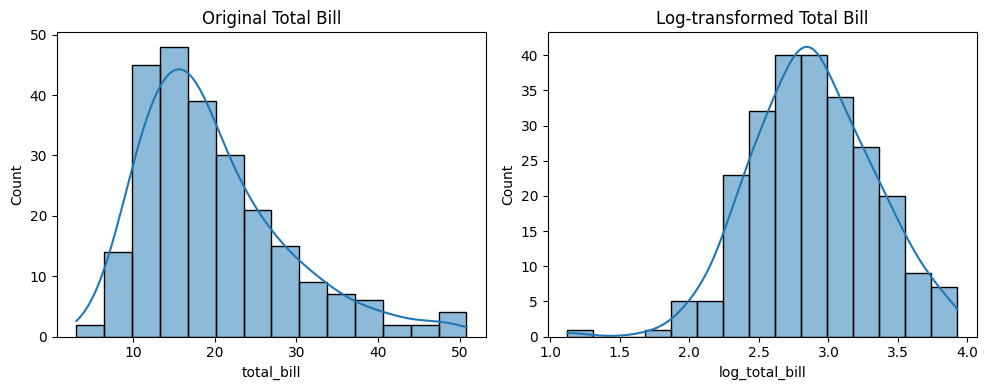

In [3]:
# Visualize the original and transformed feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(tips['total_bill'], kde=True, ax=ax1)
ax1.set_title('Original Total Bill')
sns.histplot(tips['log_total_bill'], kde=True, ax=ax2)
ax2.set_title('Log-transformed Total Bill')
plt.tight_layout()
plt.show()

In this example, we applied a logarithmic transformation to the 'total_bill' feature. This can be useful for dealing with right-skewed data, as it compresses the range of larger values.


🔑 **Key Concept:** Common mathematical transformations include logarithmic, exponential, square root, and power transformations. The choice depends on the data distribution and the problem at hand.


### <a id='toc1_2_'></a>[Interaction Features](#toc0_)


Interaction features capture the combined effect of two or more features. They can reveal complex relationships that individual features might not capture alone.


Let's create an interaction feature using the 'mpg' dataset:


In [4]:
# Load the mpg dataset
mpg = sns.load_dataset('mpg')

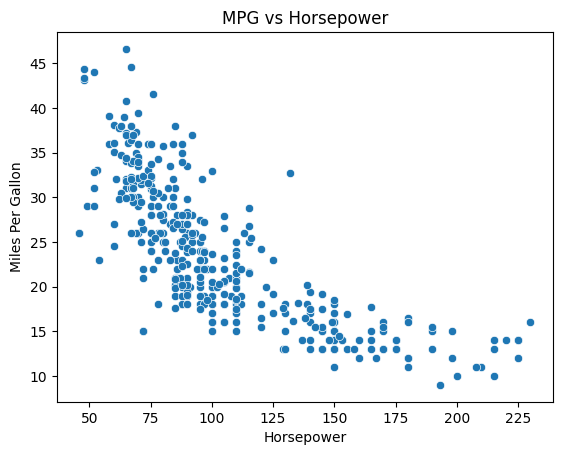

In [5]:
# Visualize the relationship
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

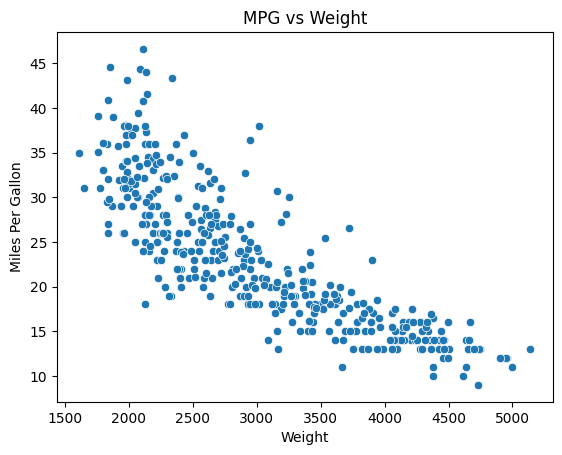

In [6]:
# Visualize the relationship
sns.scatterplot(x='weight', y='mpg', data=mpg)
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')
plt.show()

In [7]:
# Create an interaction feature: horsepower * weight
mpg['hp_weight_interaction'] = mpg['horsepower'] * mpg['weight']

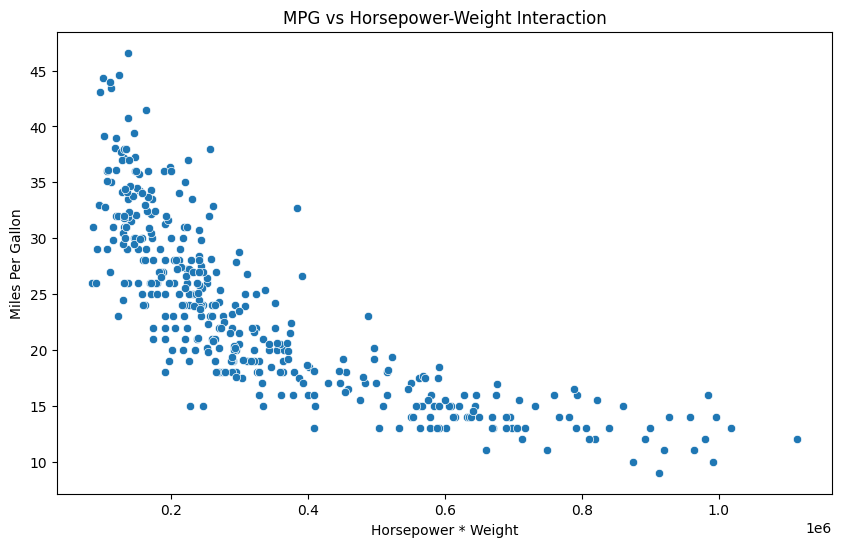

In [8]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp_weight_interaction', y='mpg', data=mpg)
plt.title('MPG vs Horsepower-Weight Interaction')
plt.xlabel('Horsepower * Weight')
plt.ylabel('Miles Per Gallon')
plt.show()

This interaction feature captures the combined effect of a car's horsepower and weight on its fuel efficiency (mpg).


💡 **Pro Tip:** Interaction features can be particularly useful when you suspect that the effect of one feature on the target variable depends on the value of another feature.


### <a id='toc1_3_'></a>[Polynomial Features](#toc0_)


Polynomial features are created by raising existing features to various powers or multiplying them together. They can help capture non-linear relationships in the data.


Let's create polynomial features using the 'boston' dataset:


/Users/hejazizo/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


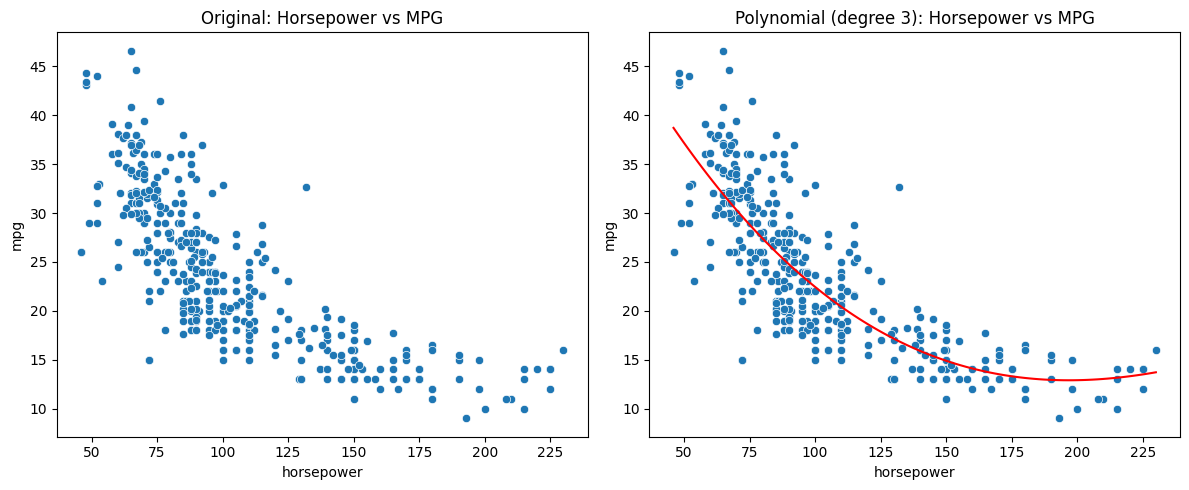

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the mpg dataset
mpg = sns.load_dataset("mpg")

# Remove rows with missing values
mpg = mpg.dropna()

# Extract horsepower and mpg
X = mpg[['horsepower']]
y = mpg['mpg']

# Plot the original relationship
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title('Original: Horsepower vs MPG')

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit a linear regression model with polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Generate points for the polynomial curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the relationship with polynomial features
plt.subplot(122)
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.plot(X_range, y_pred, color='red')
plt.title('Polynomial (degree 3): Horsepower vs MPG')

plt.tight_layout()
plt.show()


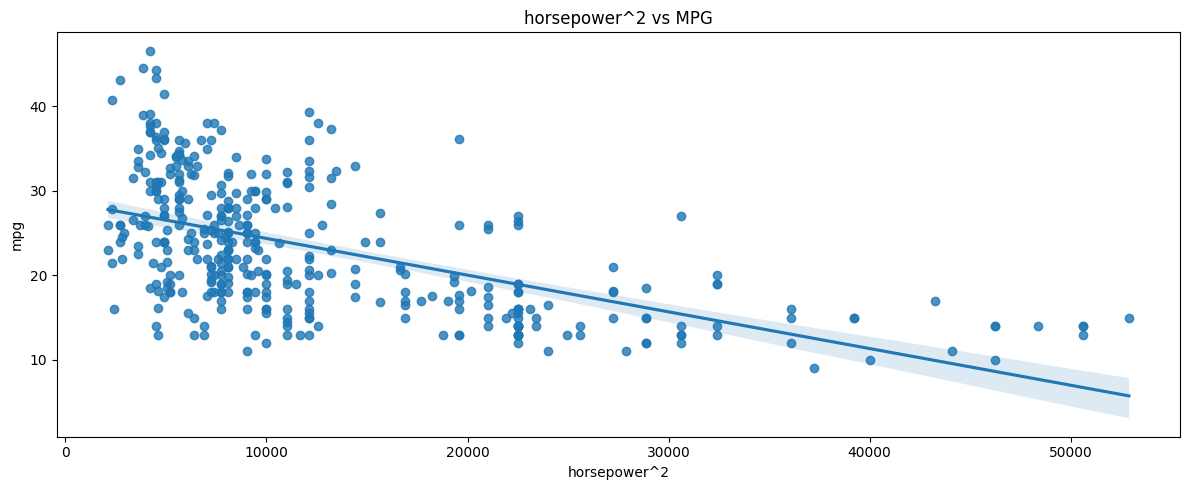

In [10]:
# Show the relationship between the 3rd degree polynomial feature and mpg
X_poly_df = pd.DataFrame(X_poly, columns=['horsepower', 'horsepower^2', 'horsepower^3'])
X_poly_df['mpg'] = y

plt.figure(figsize=(12, 5))
sns.regplot(x='horsepower^2', y='mpg', data=X_poly_df)
plt.title('horsepower^2 vs MPG')

plt.tight_layout()
plt.show()


In this example, we created a quadratic feature from the 'rm' (average number of rooms) feature. This can capture non-linear relationships between the number of rooms and house prices.


❗️ **Important Note:** While polynomial features can capture complex relationships, be cautious of overfitting, especially with higher-degree polynomials.


### <a id='toc1_4_'></a>[Binning and Discretization](#toc0_)


Binning involves grouping continuous variables into discrete categories. This can be useful for capturing non-linear relationships and dealing with outliers.


Let's apply binning to the 'diamonds' dataset:


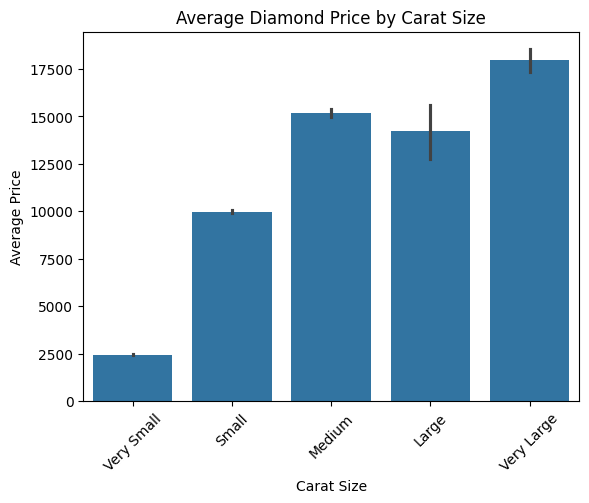

In [11]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Create bins for the 'carat' feature
diamonds['carat_bins'] = pd.cut(diamonds['carat'], bins=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

# Visualize the average price for each bin
sns.barplot(x='carat_bins', y='price', data=diamonds, estimator=np.mean)
plt.title('Average Diamond Price by Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In this example, we binned the 'carat' feature into five categories. This can reveal how diamond prices change across different size ranges, potentially capturing non-linear relationships.


🤔 **Why This Matters:** Binning can help in dealing with outliers, capturing non-linear relationships, and creating more interpretable features for certain types of models.


Feature creation is a powerful tool in your feature engineering toolkit. By applying these techniques thoughtfully, you can often significantly improve your model's performance and gain deeper insights into your data. Remember, the key is to create features that are meaningful within the context of your problem and data.

## <a id='toc2_'></a>[Feature Transformation Methods](#toc0_)

Feature transformation is a crucial aspect of feature engineering that involves modifying existing features to improve their usefulness for machine learning models. Let's explore three key feature transformation methods: Aggregation Methods, Feature Scaling, and Handling Missing Values.


<img src="./images/feature-transformation.png" width="800">

<img src="./images/feature-transformation-2.png" width="800">

Note that feature creation and feature transformation are both important aspects of feature engineering, but they have distinct differences:


**Feature Creation:**

1. Definition: Feature creation involves generating entirely new features from existing data or external sources.

2. Process: It typically requires domain knowledge and creativity to identify and construct meaningful new features that capture important aspects of the data not directly represented in the original features.

3. Output: The result is a set of new features that didn't exist in the original dataset.

4. Examples:
   - Creating a 'body mass index' feature from height and weight
   - Generating interaction terms (e.g., multiplying two features)
   - Extracting day of the week from a date column
   - Creating a feature that counts the occurrence of specific words in text data

5. Purpose: To capture complex relationships, introduce domain knowledge, or represent the data in a way that's more informative for the specific problem at hand.


**Feature Transformation:**

1. Definition: Feature transformation involves modifying existing features to change their scale, distribution, or representation.

2. Process: It typically applies mathematical functions or statistical methods to existing features without creating entirely new ones.

3. Output: The result is a modified version of existing features, often with the same meaning but different statistical properties.

4. Examples:
   - Log transformation of a skewed numeric feature
   - Standardization (z-score normalization) of numeric features
   - One-hot encoding of categorical variables
   - Binning a continuous variable into discrete categories

5. Purpose: To make features more suitable for machine learning algorithms, address issues like skewness or different scales, or to meet assumptions of specific models.

Key Differences:

1. **Novelty:** Feature creation introduces new information or representations, while transformation modifies existing information.

2. **Domain Knowledge:** Feature creation often requires more domain expertise, while many transformations can be applied more generally.

3. **Dimensionality:** Feature creation typically increases the number of features, while transformation usually maintains or reduces the number of features.

4. **Interpretability:** Created features often have clear domain interpretations, while transformed features may be less directly interpretable.

In practice, both feature creation and transformation are valuable tools in feature engineering, and they are often used together to prepare data for machine learning models. The choice between them depends on the specific dataset, problem, and model requirements.

### <a id='toc2_1_'></a>[Aggregation Methods](#toc0_)


Aggregation methods involve combining multiple data points into a single feature. This is particularly useful when dealing with grouped data or time series.


Let's use the 'flights' dataset from seaborn to demonstrate aggregation:


In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the flights dataset
flights = sns.load_dataset('flights')

In [13]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


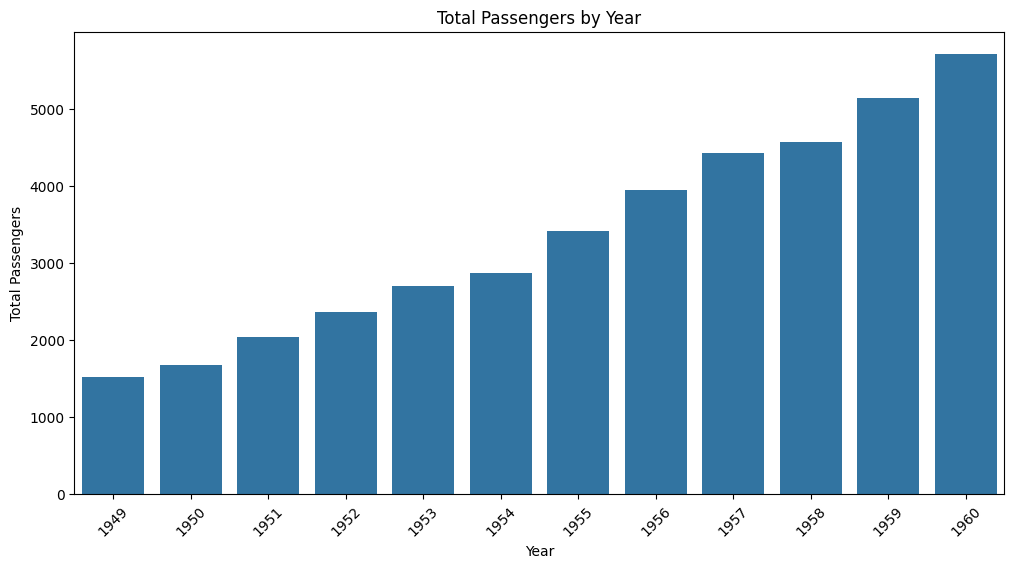

In [14]:
# Aggregate passengers by year
yearly_passengers = flights.groupby('year')['passengers'].sum().reset_index()

# Visualize the aggregated data
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='passengers', data=yearly_passengers)
plt.title('Total Passengers by Year')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.show()

In [15]:
yearly_passengers.head()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


In this example, we aggregated the number of passengers by year. This transformation can reveal trends over time that might not be apparent in the original monthly data.


🔑 **Key Concept:** Common aggregation methods include sum, mean, median, min, max, and count. The choice depends on the nature of your data and the insights you're seeking.


### <a id='toc2_2_'></a>[Feature Scaling](#toc0_)


Feature scaling is the process of normalizing the range of features in a dataset. This is important because many machine learning algorithms perform better when features are on a similar scale.


Let's demonstrate feature scaling using the 'iris' dataset:


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the iris dataset
iris = sns.load_dataset('iris')

# Select numeric columns
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Apply StandardScaler
scaler = StandardScaler()
iris_scaled = iris.copy()
iris_scaled[numeric_features] = scaler.fit_transform(iris[numeric_features])

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
iris_minmax = iris.copy()
iris_minmax[numeric_features] = minmax_scaler.fit_transform(iris[numeric_features])

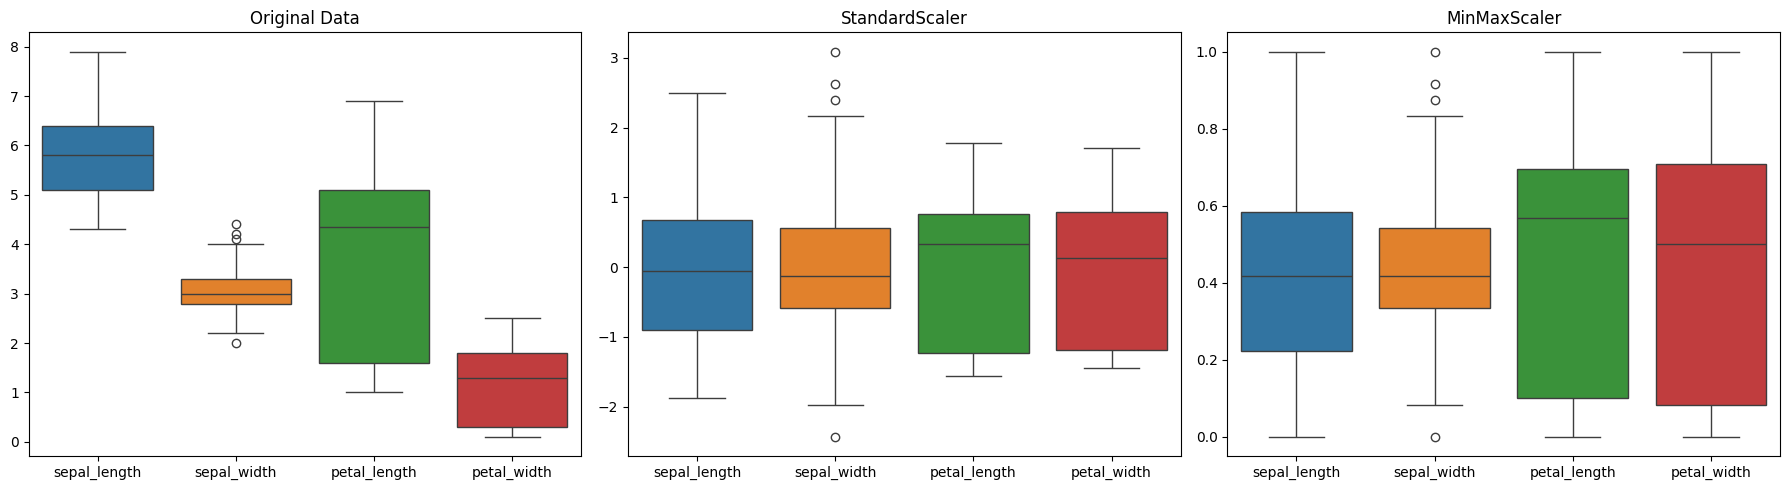

In [17]:
# Visualize the original and scaled data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=iris[numeric_features], ax=axes[0])
axes[0].set_title('Original Data')

sns.boxplot(data=iris_scaled[numeric_features], ax=axes[1])
axes[1].set_title('StandardScaler')

sns.boxplot(data=iris_minmax[numeric_features], ax=axes[2])
axes[2].set_title('MinMaxScaler')

plt.tight_layout()
plt.show()

This example demonstrates two common scaling methods:
1. StandardScaler: transforms features to have mean=0 and variance=1
2. MinMaxScaler: scales features to a fixed range, usually [0, 1]


💡 **Pro Tip:** Feature scaling is particularly important for algorithms that are sensitive to the scale of input features, such as gradient descent-based algorithms and distance-based algorithms like K-Nearest Neighbors.


Feature transformation methods like aggregation, scaling, and handling missing values are essential tools in preparing your data for machine learning models. They can help to reveal patterns, ensure fair comparison between features, and maintain the quality of your dataset. As with all aspects of feature engineering, the key is to understand your data and choose methods that align with your analytical goals.

## <a id='toc3_'></a>[Domain-Specific Feature Engineering](#toc0_)

Domain-specific feature engineering is the process of creating features that leverage specialized knowledge about a particular field or problem area. This approach can lead to highly informative features that capture nuanced aspects of the data, often resulting in significant improvements in model performance.


🔑 **Key Concept:** Domain-specific features incorporate expert knowledge and industry-specific insights that might not be immediately apparent from the raw data alone.


Let's explore domain-specific feature engineering in three different domains: text data, time series data, and geographical data.


### <a id='toc3_1_'></a>[Text Data Feature Engineering](#toc0_)


Text data requires specialized techniques to transform unstructured text into meaningful numerical features. We'll use the 'twitter_samples' dataset from nltk to demonstrate some text-specific feature engineering techniques.


In [18]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Download the twitter dataset
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/hejazizo/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [19]:
# Get positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Create a DataFrame
tweets = pd.DataFrame({
    'text': positive_tweets + negative_tweets,
    'sentiment': ['positive'] * len(positive_tweets) + ['negative'] * len(negative_tweets)
})


In [20]:
# Basic text features
tweets['word_count'] = tweets['text'].apply(lambda x: len(x.split()))
tweets['char_count'] = tweets['text'].apply(len)
tweets['avg_word_length'] = tweets['char_count'] / tweets['word_count']

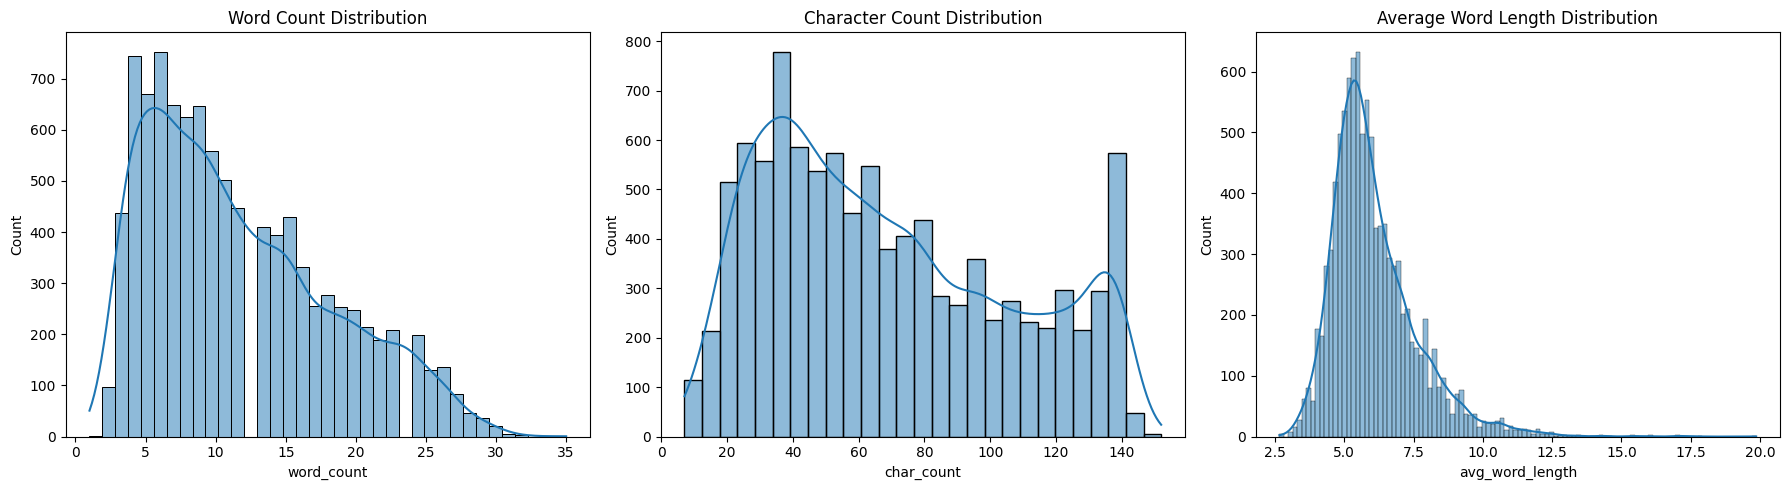

In [21]:
# Visualize basic text features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(tweets['word_count'], kde=True, ax=axes[0])
axes[0].set_title('Word Count Distribution')
sns.histplot(tweets['char_count'], kde=True, ax=axes[1])
axes[1].set_title('Character Count Distribution')
sns.histplot(tweets['avg_word_length'], kde=True, ax=axes[2])
axes[2].set_title('Average Word Length Distribution')
plt.tight_layout()
plt.show()

In [22]:
# Bag of Words
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
bow_features = vectorizer.fit_transform(tweets['text'])
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer.get_feature_names_out())

print("Top 10 most common words:")
print(bow_df.sum().sort_values(ascending=False).head(10))

Top 10 most common words:
http      1237
https      516
thanks     470
follow     450
just       435
like       425
love       408
good       334
day        308
want       292
dtype: int64


In [23]:
bow_df

,000,10,100,11,12,13,15,20,2015,24,...,young,youre,youth,youtube,yup,zayn,zayniscomingbackonjuly26,zaynmalik,ｍｅ,ｓｅｅ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Sentiment-specific word counts
positive_words = ['good', 'great', 'awesome', 'love', 'excellent']
negative_words = ['bad', 'awful', 'terrible', 'hate', 'poor']

for word in positive_words + negative_words:
    tweets[f'{word}_count'] = tweets['text'].str.count(word)

In [25]:
tweets

,text,sentiment,word_count,char_count,avg_word_length,good_count,great_count,awesome_count,love_count,excellent_count,bad_count,awful_count,terrible_count,hate_count,poor_count
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,15,111,7.400000,0,0,0,0,0,0,0,0,0,0
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,24,126,5.250000,0,0,0,0,0,0,0,0,0,0
2,@DespiteOfficial we had a listen last night :)...,positive,20,107,5.350000,0,0,0,0,0,0,0,0,0,0
3,@97sides CONGRATS :),positive,3,20,6.666667,0,0,0,0,0,0,0,0,0,0
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,21,106,5.047619,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,I wanna change my avi but uSanele :(,negative,8,36,4.500000,0,0,0,0,0,0,0,0,0,0
9996,MY PUPPY BROKE HER FOOT :(,negative,6,26,4.333333,0,0,0,0,0,0,0,0,0,0
9997,where's all the jaebum baby pictures :((,negative,7,40,5.714286,0,0,0,0,0,0,0,0,0,0
9998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,9,60,6.666667,0,0,0,0,0,0,0,0,0,0


In this example, we've created text-specific features:
1. Basic text statistics (word count, character count, average word length)
2. Bag of Words representation


💡 **Pro Tip:** For text data, consider using pre-trained word embeddings like Word2Vec or GloVe for more sophisticated feature representations.


### <a id='toc3_2_'></a>[Time Series Feature Engineering](#toc0_)


Time series data often requires features that capture temporal patterns and trends. We'll use the 'air_quality' dataset from seaborn to demonstrate time series feature engineering.


In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the flights dataset
flights = sns.load_dataset('flights')

# Convert year and month to datetime
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str) + '-01')

# Sort by date
flights = flights.sort_values('date')

flights

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


In [27]:
# Time-based features
flights['year'] = flights['date'].dt.year
flights['month'] = flights['date'].dt.month
flights['quarter'] = flights['date'].dt.quarter
flights['is_summer'] = flights['month'].isin([6, 7, 8]).astype(int)

# Lag features
flights['passengers_lag1'] = flights['passengers'].shift(1)
flights['passengers_lag12'] = flights['passengers'].shift(12)  # 1 year lag

# Rolling window features
flights['passengers_rolling_mean_3'] = flights['passengers'].rolling(window=3).mean()
flights['passengers_rolling_std_3'] = flights['passengers'].rolling(window=3).std()

# Year-over-year growth
flights['yoy_growth'] = (flights['passengers'] - flights['passengers_lag12']) / flights['passengers_lag12']

flights

,year,month,passengers,date,quarter,is_summer,passengers_lag1,passengers_lag12,passengers_rolling_mean_3,passengers_rolling_std_3,yoy_growth
0,1949,1,112,1949-01-01,1,0,NaN,NaN,NaN,NaN,NaN
1,1949,2,118,1949-02-01,1,0,112.0,NaN,NaN,NaN,NaN
2,1949,3,132,1949-03-01,1,0,118.0,NaN,120.666667,10.263203,NaN
3,1949,4,129,1949-04-01,2,0,132.0,NaN,126.333333,7.371115,NaN
4,1949,5,121,1949-05-01,2,0,129.0,NaN,127.333333,5.686241,NaN
...,...,...,...,...,...,...,...,...,...,...,...
139,1960,8,606,1960-08-01,3,1,622.0,559.0,587.666667,46.306947,0.084079
140,1960,9,508,1960-09-01,3,0,606.0,463.0,578.666667,61.719797,0.097192
141,1960,10,461,1960-10-01,4,0,508.0,407.0,525.000000,73.979727,0.132678
142,1960,11,390,1960-11-01,4,0,461.0,362.0,453.000000,59.405387,0.077348


/var/folders/g_/1vbng5jn1nv9ztt7z6_k8lg00000gn/T/ipykernel_58660/4252558151.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
/var/folders/g_/1vbng5jn1nv9ztt7z6_k8lg00000gn/T/ipykernel_58660/4252558151.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Non-Summer', 'Summer'])


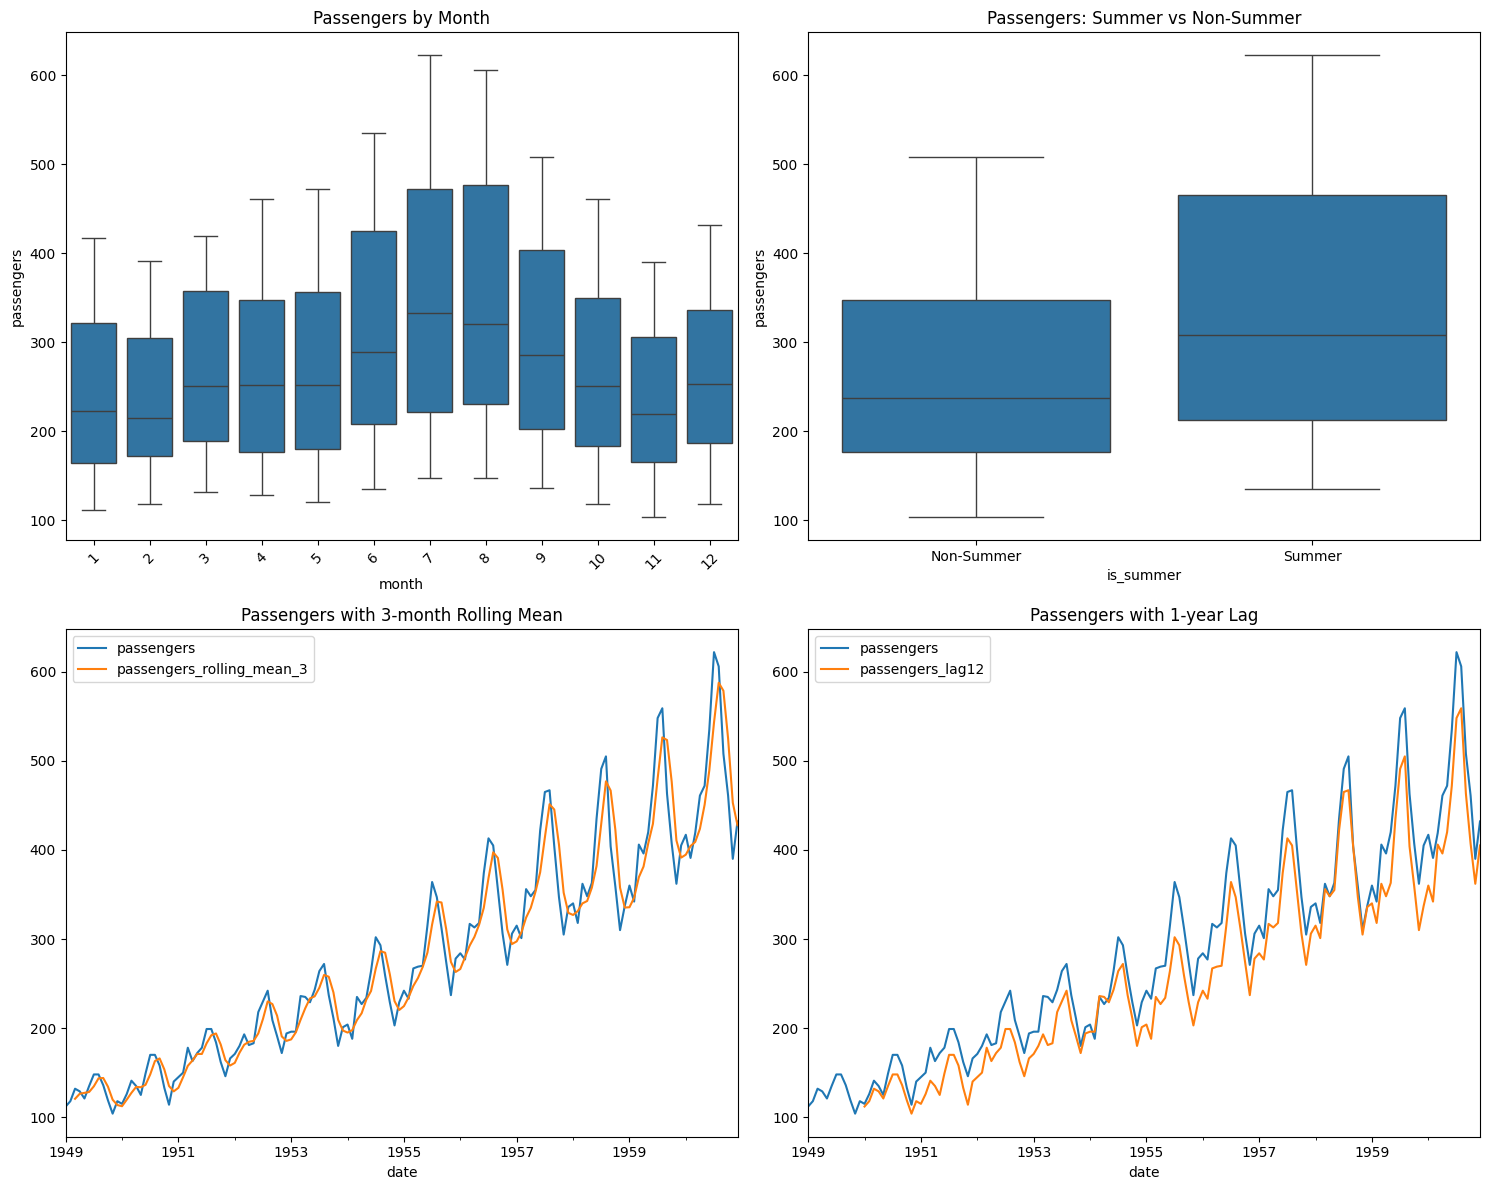

In [28]:
# Visualize some of the engineered features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x='month', y='passengers', data=flights, ax=axes[0, 0])
axes[0, 0].set_title('Passengers by Month')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

sns.boxplot(x='is_summer', y='passengers', data=flights, ax=axes[0, 1])
axes[0, 1].set_title('Passengers: Summer vs Non-Summer')
axes[0, 1].set_xticklabels(['Non-Summer', 'Summer'])

flights.plot(x='date', y=['passengers', 'passengers_rolling_mean_3'], ax=axes[1, 0])
axes[1, 0].set_title('Passengers with 3-month Rolling Mean')

flights.plot(x='date', y=['passengers', 'passengers_lag12'], ax=axes[1, 1])
axes[1, 1].set_title('Passengers with 1-year Lag')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

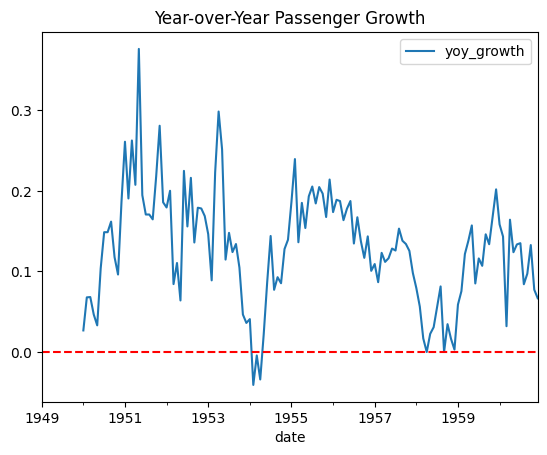

In [29]:
# Visualize year-over-year growth
plt.figure(figsize=(12, 6))
flights.plot(x='date', y='yoy_growth')
plt.title('Year-over-Year Passenger Growth')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [30]:
print(flights[['date', 'passengers', 'is_summer', 'passengers_lag12', 'yoy_growth']].head(15))

         date  passengers  is_summer  passengers_lag12  yoy_growth
0  1949-01-01         112          0               NaN         NaN
1  1949-02-01         118          0               NaN         NaN
2  1949-03-01         132          0               NaN         NaN
3  1949-04-01         129          0               NaN         NaN
4  1949-05-01         121          0               NaN         NaN
5  1949-06-01         135          1               NaN         NaN
6  1949-07-01         148          1               NaN         NaN
7  1949-08-01         148          1               NaN         NaN
8  1949-09-01         136          0               NaN         NaN
9  1949-10-01         119          0               NaN         NaN
10 1949-11-01         104          0               NaN         NaN
11 1949-12-01         118          0               NaN         NaN
12 1950-01-01         115          0             112.0    0.026786
13 1950-02-01         126          0             118.0    0.06

In this example, we've created several time series-specific features:
1. Time-based features (year, month, day of week, is_weekend)
2. Lag features
3. Rolling window features (moving average and standard deviation)


🤔 **Why This Matters:** These features can capture seasonal patterns, trends, and autocorrelations in the time series data, which are crucial for many forecasting tasks.



## <a id='toc4_'></a>[Summary](#toc0_)

In this lecture, we've explored various aspects of feature engineering, focusing on feature creation and transformation techniques. Let's recap the key points:

1. **Mathematical Transformations**: We learned how to apply mathematical functions to existing features, such as logarithmic and polynomial transformations, to capture non-linear relationships and normalize data distributions.

2. **Aggregation Methods**: We explored techniques for combining multiple data points into single features, which is particularly useful for grouped data or time series analysis.

3. **Feature Scaling**: We discussed the importance of normalizing feature ranges and demonstrated techniques like StandardScaler and MinMaxScaler.

4. **Handling Missing Values**: We covered strategies for dealing with missing data, including imputation techniques and creating flags for missingness.

5. **Domain-Specific Feature Engineering**: We delved into specialized techniques for different types of data:
   - Text data: Creating features like word count, TF-IDF, and sentiment-specific word counts.
   - Time series data: Developing lag features, rolling statistics, and temporal indicators.
   - Geographical data: Calculating distances and clustering based on coordinates.


Effective feature engineering requires a combination of domain knowledge, creativity, and technical skills. The goal is to create features that capture the underlying patterns in your data in a way that's meaningful for your specific problem and remember to always validate the impact of your engineered features on model performance. Not all created features will be useful, and some may even introduce noise or redundancy.


Well-engineered features can often have a more significant impact on model performance than the choice of algorithm itself. They can make complex patterns more apparent, simplify the learning task for your model, and even allow you to achieve good results with simpler, more interpretable models.


In our next lecture, we'll dive deeper into two crucial aspects of feature engineering:

1. **Feature Extraction**: We'll explore techniques for automatically deriving informative features from complex, high-dimensional data. This includes methods like Principal Component Analysis (PCA) and autoencoders.

2. **Feature Selection**: We'll learn about strategies for choosing the most relevant subset of features for our models. This includes filter methods, wrapper methods, and embedded methods.


❗️ **Important Note:** Feature engineering is an iterative process. As you gain insights from your models and acquire more domain knowledge, you'll often revisit your feature engineering steps to refine and improve your features.


By mastering these feature engineering techniques, you'll be well-equipped to tackle a wide range of machine learning problems across various domains. Remember, the art of feature engineering lies in creatively applying these methods to extract the most meaningful information from your data.